## Calculate Grades

In [69]:
#import required libraries
from scipy.stats import norm, binom
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#helper functions
def ordinal(num: int) -> str:
    """returns a ordinal string of int """
    SUFFIXES = {1: 'st', 2: 'nd', 3: 'rd'}
    # I'm checking for 10-20 because those are the digits that
    # don't follow the normal counting scheme. 
    if 10 <= num % 100 <= 20:
        suffix = 'th'
    else:
        # the second parameter is a default.
        suffix = SUFFIXES.get(num % 10, 'th')
    return str(num) + suffix

In [123]:
#input information
mean : float = 5.5
sd: float = 0.68
total_students: str = 5 #including you
personal_score: float = 6.1
unit: str = "American Grade"
subject: str = "math"

In [124]:
# Calculate z-score for score
z_score = (personal_score - mean) / sd

# Calculate the probability of getting a score less than personal_score
prob_lower = norm.cdf(z_score)
# Calculate the probability of getting a score higher than personal_score
prob_higher = 1 - norm.cdf(z_score)

# Print the result
print(f"Percentage of students who got LESS than {personal_score} {unit} in {subject}:", round(prob_lower*100, 2), "%")
print(f"Percentage of students who got HIGHER than {personal_score} {unit} in {subject}:", round(prob_higher*100, 2), "%")
print("")
print(f"Amongst {total_students} students: {int(round((prob_lower*total_students), 0))} got a LOWER {unit} in {subject} than your {personal_score}.")
print(f"Amongst {total_students} students: {int(total_students-1-round((prob_lower*total_students), 0))} got a HIGHER {unit} in {subject} than your {personal_score}.")


Percentage of students who got LESS than 6.1 American Grade in math: 81.12 %
Percentage of students who got HIGHER than 6.1 American Grade in math: 18.88 %

Amongst 5 students: 4 got a LOWER American Grade in math than your 6.1.
Amongst 5 students: 0 got a HIGHER American Grade in math than your 6.1.


In [125]:
#probability to be the best in class
# number of sucesses (lower score) r in n independent trials
n = total_students -1
p = prob_higher
# defining the list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(f"Amongst {total_students} students: chances you got the {ordinal(i+1)} highest {unit} in {subject}: ", round(dist[i]*100,2), "%")
 #   print(str(r_values[i]) + "\t" + str(dist[i]))


r	p(r)
Amongst 5 students: chances you got the 1st highest American Grade in math:  43.3 %
Amongst 5 students: chances you got the 2nd highest American Grade in math:  40.31 %
Amongst 5 students: chances you got the 3rd highest American Grade in math:  14.07 %
Amongst 5 students: chances you got the 4th highest American Grade in math:  2.18 %
Amongst 5 students: chances you got the 5th highest American Grade in math:  0.13 %


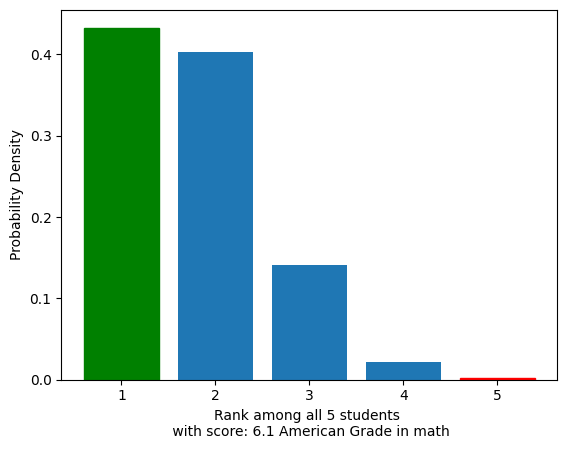

In [129]:
#bar graph showing the possibility for each rank.
ranking = [r+1 for r in r_values]
barlist = plt.bar(ranking, dist, width=0.8)
barlist[0].set_color('g')
barlist[-1].set_color('r')
plt.xlabel(f'Rank among all {total_students} students \n with score: {personal_score} {unit} in {subject}')
plt.ylabel('Probability Density')
plt.show()